# <center>__Assignment 3__</center>

In [1]:
"""load required packages"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix,\
                            precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## __Question 1__

For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas) contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, you would use the Undecided variable as your output variable and the rest of the variables as your input variables. You want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0). 

### a) Upload the data into Python and check for missing data. If there is any missing data, drop the cases that have the missing data. 

In [2]:
"""load data into Python and check for missing records"""

blue_or_red = pd.read_csv('Blueorred.csv')
blue_or_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   HomeOwner      10000 non-null  int64  
 2   Female         10000 non-null  int64  
 3   Married        10000 non-null  int64  
 4   HouseholdSize  10000 non-null  int64  
 5   Income         10000 non-null  float64
 6   Education      10000 non-null  int64  
 7   Church         10000 non-null  int64  
 8   Undecided      10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


### b)	 Normalize the continuous variables using min-max normalization. You should obtain a new dataset that has your normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and your output variable.

In [3]:
"""
apply  min-max normalization to the data and assign to a new variable
blue_or_red_norm
"""

# make a list of continuous variables
continuous_idx = ['Age', 'HouseholdSize', 'Income', 'Education']
# make a copy  of the original dataset
blue_or_red_norm = blue_or_red.copy()
# instantiate sklearn MinMaxScaler, fit and transform data
scaler = MinMaxScaler()
blue_or_red_norm[continuous_idx] = scaler.fit_transform(blue_or_red_norm[continuous_idx])
blue_or_red_norm.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


### c)	Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Scaler which standardizes the data?

When continuous variables are not measured at the same scale, they do not contribute equally during model fitting. This can create a biased model. This is especially true in the case of classification decision trees where splits at each leaf node are determined by measuring which attribute best separates the data. Using the scikit-learn MinMaxScaler will scale the data so that each continuous attribute value will fall between 0 and 1 regardless of the original scale.

### d)	Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42. 

In [4]:
"""split the data into training and test sets"""

# separate features and target
X = blue_or_red_norm.iloc[:, :-1]
y = blue_or_red_norm.iloc[:, -1:]
# create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    random_state=42)

In [6]:
"""print the shape of the training set"""

print(X_train.shape)
print(y_train.shape)

(7000, 8)
(7000, 1)


In [7]:
"""print the shape of the test set"""

print(X_test.shape)
print(y_test.shape)

(3000, 8)
(3000, 1)


### e)	Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. 

In [8]:
"""construct the decision tree classifier and fit ti the training data"""

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
"""make predictions on the training set and print the first 100 predictions"""

y_train_pred = dtc.predict(X_train)
y_train_pred[0:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [10]:
"""make predictions on the test set and print the first 100 predictions"""

y_test_pred = dtc.predict(X_test)
y_test_pred[0:100]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

### f)	Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?  

In [11]:
"""print accuracy score for predictions made on the training set"""

print(accuracy_score(y_train, y_train_pred))

1.0


In [12]:
"""print accuracy score for predictions made on the test set"""

print(accuracy_score(y_test, y_test_pred))

0.97


The decision tree does not appear to overfit the model. A prediction accuracy of 100% on the training set is unusual and is normally a sign of overfitting, but when considering an accuracy on the test set of approximately 97% its clear the model performed almost equally well on unseen data.

### g)	Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [13]:
"""use the tree estimator .score() method to print accuracy of predictions on the training set"""

print(dtc.score(X_train, y_train))

1.0


In [14]:
"""use the tree estimator .score() method to print the accuraccy of predictions on the test set"""

print(dtc.score(X_test, y_test))

0.97


### h)	Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [15]:
"""compute and print the prediction error on the training set"""

print(zero_one_loss(y_train, y_train_pred))

0.0


In [16]:
"""compute and print the prediction error on the training set"""

print(zero_one_loss(y_test, y_test_pred))

0.030000000000000027


## Question 2

Do other assessment of your model using the following tools in sklearn.metrics module

### a)	Generate the classification report using the classification_report () 

In [17]:
"""print classification report for model applied to the training set"""

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4172
           1       1.00      1.00      1.00      2828

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [18]:
"""print classification report for model applied to the test set"""

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1814
           1       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### b)	Generate the confusion matrix using confusion_matrix() 

In [19]:
"""print the confusion matrix for the model applied to the training set"""

confusion_matrix(y_train, y_train_pred)

array([[4172,    0],
       [   0, 2828]])

In [20]:
"""print the confusion matrix for the model applied to the test set"""

confusion_matrix(y_test, y_test_pred)

array([[1763,   51],
       [  39, 1147]])

### c)	Generate the precision score using precision_score() 

In [21]:
"""print the precision score for model applied to the training set"""

print(precision_score(y_train, y_train_pred))

1.0


In [22]:
"""print the precision score for model applied to the test set"""

print(precision_score(y_test, y_test_pred))

0.9574290484140233


### d)	Generate the recall score using recall_score()

In [23]:
"""print the recall score for the model applied to the training set"""

print(recall_score(y_train, y_train_pred))

1.0


In [24]:
"""print the recall score for the model applied to the test set"""

print(recall_score(y_test, y_test_pred))

0.9671163575042159


### e)	Generate the f1 score using f1_score()

In [25]:
"""print the F1 score for the model applied to the training set"""

print(f1_score(y_train, y_train_pred))

1.0


In [26]:
"""print the F1 score for the model applied to the test set"""

print(f1_score(y_test, y_test_pred))

0.962248322147651


### f)	When is it more appropriate to use f1 score (or precision score and recall) compared to using the overall accuracy to evaluate your model?

The F1 score is most appropriate when the goal is to build a model that strikes a balance between strong precision and recall scores. A low score for either precision or recall will have significant effects on the F1 score. For example, if a machine learning model was trained to identify cancerous cells a strong F1 score would be important. The model must perform well in predicting any cancerous cells as cancerous, but also perform well in correctly predicting cancerous cells (a low false positive rate).

### g)	Generate a roc curve using plot_roc_curve() 

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


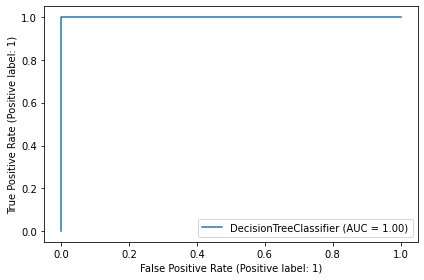

In [27]:
"""plot ROC curve for the model applied to the training set"""

plot_roc_curve(dtc, X_train, y_train)
plt.tight_layout()
plt.show()

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


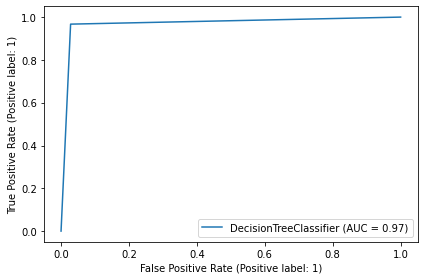

In [28]:
"""plot ROC curve for the model applied to the test set"""

plot_roc_curve(dtc, X_test, y_test)
plt.tight_layout()
plt.show()

### h)	Plot the confusion matrix using plot_confusion_matrix

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


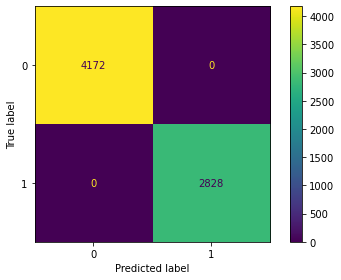

In [29]:
"""plot the confusion matrix for the model applied to the training set"""

plot_confusion_matrix(dtc, X_train, y_train)
plt.tight_layout()
plt.show()

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


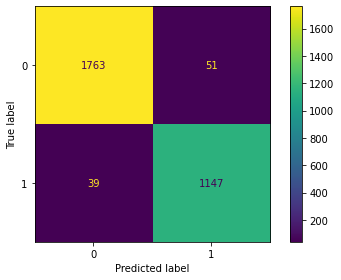

In [30]:
"""plot the confusion matrix for the model applied to the test set"""

plot_confusion_matrix(dtc, X_test, y_test)
plt.tight_layout()
plt.show()

## Question 3

You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. The hyperparameters of a decision tree as shown below. We are more interested in optimizing the depth of the tree (max_depth). 

### a)	First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where clf is the name of your estimator and tree is the module in sklearn.

In [31]:
"""retrieve the max depth of the decision tree estimator"""

max_depth = dtc.tree_.max_depth
print(max_depth)

18


### b)	You will find the optimal depth of the tree by tuning the max_depth hyperparameter. Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree. Here are ideas for your code (See class notes on Modeling in Scikit-learn for more ideas):

You will need to initialize a variable outside the loop to track the error rates for each maximum depth value.

Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate. Does this value match with what you see on your plot?

In [32]:
"""
write a for loop to iteratively test different hyperparameter values for max depth
of the decision tree.
"""

# initialize variable to store the maximum tree depth values as range
depth_range = range(1, max_depth+1)
# instantiate empty list to store model results for different values of max_depth
test_accuracy = []
# use a for loop to iteratively get the sccores
for depth in depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_test, y_test)
    test_acc = dtc.score(X_test, y_test)
    test_accuracy.append(test_acc)

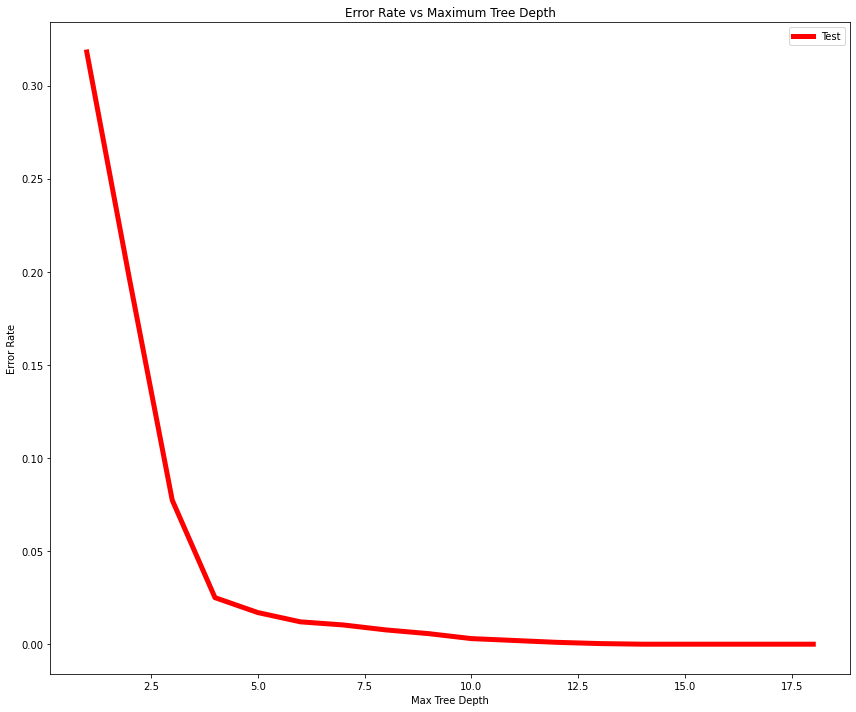

In [33]:
"""plot hyperparameter tuning results"""

plt.figure(figsize=(12, 10))
# error rate (1-accuracy) for given tree depth
plt.plot(depth_range, 1-np.array(test_accuracy), lw=5, c='red')
plt.legend(['Test'])
plt.title('Error Rate vs Maximum Tree Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

In [34]:
"""print the optimal tree depth"""

# error rate (1-accuracy) for given tree depth
test_error = 1 - np.array(test_accuracy)
best_depth = depth_range[np.argmin(test_error)]
print("The optimal tree depth is ", best_depth)

The optimal tree depth is  14


An optimal tree depth of 14 corresponds to what is shown on the Error Rate vs Tree Depth plot.

### c)	Now, you will still find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, you will be simultaneously optimizing the max_features hyperparameter as well. You can check the documentation to see what these hyperparameters represent. You will use the GridSearchCV() constructor inside the sklearn.model_selection module. Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have the same optimal maximum depth as you got in the question above?  (See class notes on Modeling in Scikit-learn for more ideas). You can use these parameter grid as one of the arguments:

![Parameter Grid](params.png)

In [36]:
"""estimate the best model hyperparameter using grid search cross validation"""

# instantiate the estimator
dtc = DecisionTreeClassifier(random_state=42)
# specify parameters
param_grid = {'max_depth': depth_range, 'max_features': [0.2, 0.4, 0.6, 0.8]}
# instantate grid and perform search
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=8)
grid.fit(X_test, y_test)
print("The optimal hyperparameters are:", grid.best_params_)

The optimal hyperparameters are: {'max_depth': 6, 'max_features': 0.8}


The optimal tree depth obtained by applying grid search cross-validation to the test set differs from what is specified on the plot portraying manual hyperparameter tuning results. This is likely due to adding an additional hyperparameter to the grid search and using k-fold cross-validation.

### d)	You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module. You will use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree. Here is a code snippet idea (see assignment instructions):
 
Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree. Also use the np.argmin() on the error rates to retrieve the optimal maximum depth , corresponding to the lowest error rate. Does the retrieved optimal maximum depth look like what you see on your plot? ?  (See class notes on Modeling in Scikit-learn for more ideas).


In [37]:
"""
apply hyperparameter tuning using cross validation
and a for loop
"""

# instantiate a list to store the test error for each param value
test_error = []
# loop through possible values of max depth and cross val error to get test_error
for depth in depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_test, y_test)
    scores = cross_val_score(estimator=dtc, X=X_test, y=y_test, scoring='accuracy', cv=8)
    test_error.append(1-np.mean(scores))

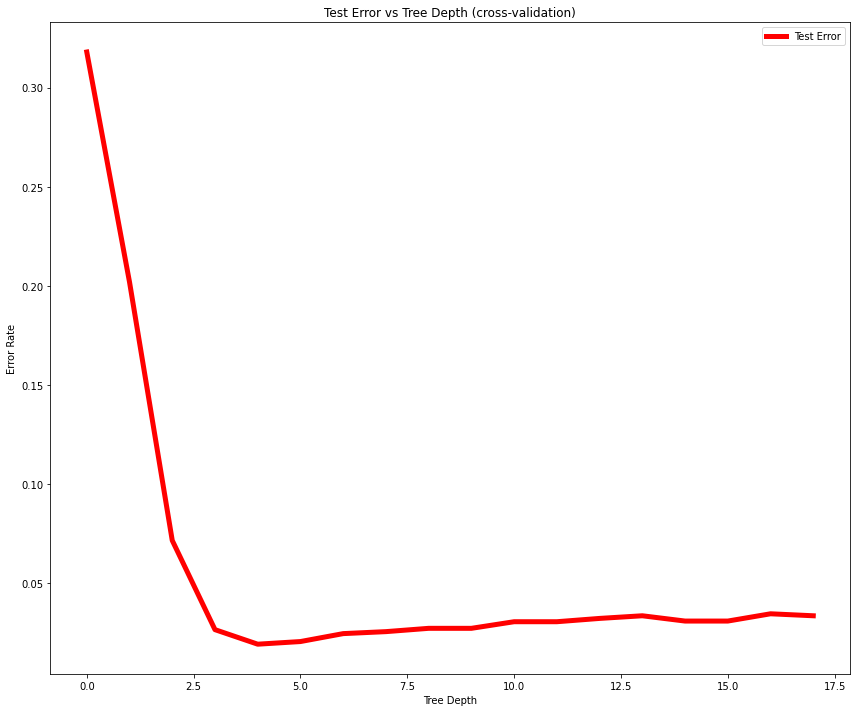

In [39]:
"""plot the test error for cross validation using different tree depths"""

plt.figure(figsize=(12, 10))
# test error (1-accuracy)
plt.plot(test_error, lw=5, c='red')
plt.title('Test Error vs Tree Depth (cross-validation)')
plt.legend(['Test Error'])
plt.xlabel('Tree Depth')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

In [40]:
"""print the optimal tree depth"""

best_depth = depth_range[np.argmin(test_error)]
print("The optimal tree depth is ", best_depth)

The optimal tree depth is  5


The retrieved optimal maximum depth matches what is portrayed on the Tree Depth vs Error (cross-validation) plot.

### e)	You will use another approach to plot the error rates versus the maximum depth of the tree. Here, you would use the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets. Then plot the error rates on the training set versus the maximum depth values. Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values. What is the optimal maximum depth? (See class notes on Modeling in Scikit-learn for more ideas).

In [41]:
"""
use the sklearn validation curve function to plot the error rate
for each max tree depth value in the range(1, 19)
"""

# instantiate a DecisionTreeClassifier estimator
dtc = DecisionTreeClassifier()
# get training and validation accuracy
train_acc, test_acc = validation_curve(dtc, X_test, y_test, param_name='max_depth',
                                       param_range=range(1, 19), cv=8)
# get the average error rate from the training folds for each depth value
train_acc_avg = np.mean(train_acc, axis=1)
train_error = 1 - train_acc_avg
# get the average error rate from the test fold for each  depth value
test_acc_avg = np.mean(test_acc, axis=1)
test_error = 1 - test_acc_avg

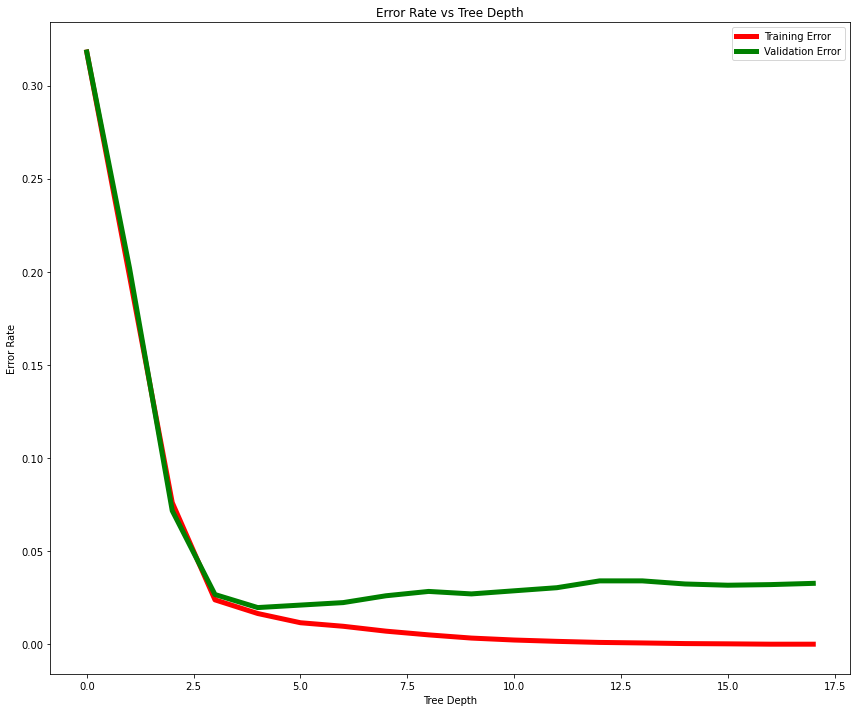

In [43]:
"""plot the results"""

plt.figure(figsize=(12, 10))
# train_error, test_error (1-accuracy for each fold)
plt.plot(train_error, lw=5, c='red')
plt.plot(test_error, lw=5, c='green')
plt.legend(['Training Error', 'Validation Error'])
plt.ylabel('Error Rate')
plt.xlabel('Tree Depth')
plt.title('Error Rate vs Tree Depth')
plt.tight_layout()
plt.show()

In [44]:
"""print the optimal tree depth"""

best_depth = depth_range[np.argmin(test_error)]
print("The optimal tree depth is ", best_depth)

The optimal tree depth is  5


The optimal tree depth derived using the validation_curve() is identical to that obtained using grid search cross-validation.

## Question 4 

Find your own dataset suitable for classification with at least three input variables and 200 cases: You will build a decision tree classifier and a random forest classifier. Find some interesting dataset instead of the popular iris data, etc. Feel free to use a dataset suitable for classification from this link provided below or some other source of your choice: https://vincentarelbundock.github.io/Rdatasets/articles/data.html 

Address the following and include code/output snippets from b) to f). Include the response under each sub question. 

### a)	State your research question, for example: Are decision trees and random forest good models for predicting whether someone will default on a loan or not based on their age and income level? This is just an example, your dataset does not have to be (or should not be) about loans.

Sales opportunities can be simply defined as sales accounts that have been qualified as showing legitimate interest in purchasing a product or service from another business entity. Attributes regarding sales opportunities are often tracked for the purpose of developing targeted sales campaigns. Attributes may include things such as, name of the primary contact associated with an opportunity, annual revenue of the company associated with a given sales opportunity, etc. A sales opportunity that results in a sale is referred to as a win. An opportunity that does not result in a sale is referred to as a loss. Using past observations of won and lost opportunities can a decision tree classifier or random forest classifier be used to predict win or loss (1/0) for opportunities currently in an organization's sales pipeline.

__Data Dictionary__

- Est_Revenue - The estimated revenue expected if a sales opportunity is won.

- Annual_Revenue - The annual revenue of the company listed on the sales account associated with a given sales opportunity.

- days_active - The number of days an opportunity record was active before being closed as a win or loss. This feature was extracted by subtracting System_Close_Date from Created_On (record creation date) for a given opportunity.

- No_of_Employees - The number of employees working for the business listed on the sales account record that is associated with a given opportunity.

- Won - Binary outcome for a given sales opportunity reccord (1 = won 0 = lost)

ASIDE: This data was obtained from my current employer's historical records and should not be shared or re-used outside of this assignment.

### b)	Data pre-processing (to the extent deemed necessary)

In [55]:
"""load opportunity data and check for missing values"""

opportunities = pd.read_csv('opportunities.csv')
opportunities.set_index('opportunity_id', inplace=True)
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593 entries, 7e8506e1-2c9b-e711-8118-005056ad09ed to d3ab2c66-ec15-e711-8114-005056ad6943
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Est_Revenue      2593 non-null   float64
 1   Annual_Revenue   2593 non-null   float64
 2   days_active      2593 non-null   float64
 3   No_of_Employees  2593 non-null   float64
 4   Won              2593 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.5+ KB


In [56]:
"""apply preprocessing to the data"""

# instantiate scaler
scaler = MinMaxScaler()
# get index of numeric features
numeric_idx = opportunities.select_dtypes(include=['int64', 'float64']).columns
# fit and transform numeric features
opportunities[numeric_idx] = scaler.fit_transform(opportunities[numeric_idx])

### c)	Data splitting 

In [57]:
"""partition the data into training and test sets"""

X = opportunities.iloc[:, :-1]
y = opportunities.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

### d)	Model construction (a decision tree and a random forest)

In [59]:
"""construct a decision tree classifier and random forest classifier"""

# instantiate estimators, set random seed for reproducability
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

### e)	Hyperparameter turning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learned in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want). 

In [60]:
"""apply grid search cross validation with decision tree classifier and extract the best parameters"""

params = {'max_depth': depth_range, 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=3)
dtc_grid_search.fit(X_train, y_train.to_numpy().ravel())
print("The optimal hyperparameters for the decision tree calssifier are:", dtc_grid_search.best_params_)

The optimal hyperparameters for the decision tree calssifier are: {'max_depth': 8, 'max_features': 0.2}


In [61]:
"""apply grid search cross validation with random forest classifier and extract the best parameters"""

params = {'max_depth': depth_range, 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=3)
rfc_grid_search.fit(X_train, y_train.to_numpy().ravel())
print("The optimal hyperparameters for the random forest classifier are:", rfc_grid_search.best_params_)

The optimal hyperparameters for the random forest classifier are: {'max_depth': 18, 'max_features': 0.2}


### f)	Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest).

In [62]:
"""use best estimator and compute the accuracy score for the decision tree classifier on the training set"""

dtc = dtc_grid_search.best_estimator_
dtc.score(X_train, y_train)

0.7900826446280992

In [63]:
"""use best estimator and compute the accuraccy score for the decision tree classifier on the test set"""

dtc.score(X_test, y_test)

0.7223650385604113

In [66]:
"""use best estimator and compute the accuracy sccore for the random forest classifier on the training set"""

rfc = rfc_grid_search.best_estimator_
rfc.score(X_train, y_train)

0.9994490358126722

In [65]:
"""compute the accuracy score for the random forest classifier on the test set"""

rfc.score(X_test, y_test)

0.8020565552699229

### g)	Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why? 

The decision tree classifier and random forest classifier both performed moderately well when tuned, fit, and applied to the sales opportunity data. The decision tree classifier produced an accuracy score of approximately 79% in making predictions on the training set and an accuracy score of approximately 72% in making predictions on the test set. The random forest classifier was approximately 100% accurate in making predictions on the training set and only 80% accurate in making predictions on the test set. The roughly 20% difference in accuracy when making predictions on unseen data suggests that the random forest classifier is overfitting the training set and may not generalize well in production. Even though the accuracy scores were lower for the decision tree classifier it is still the best choice between the two models. It’s best to choose a model which will generalize well in production and further hyperparameter tuning might boost performance of the decision tree classifier.